In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:\python\Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=10,8

<AxesSubplot:>

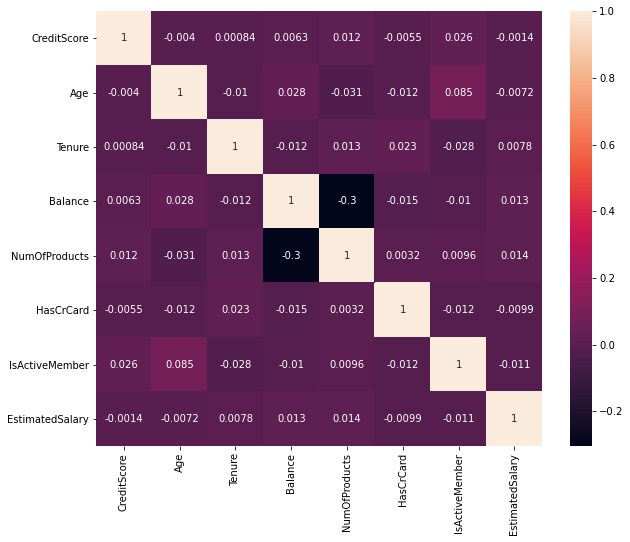

In [7]:
import seaborn as sb
sb.heatmap(df[['CreditScore' ,'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']].corr(), annot=True)

In [8]:
df.describe().columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<AxesSubplot:>

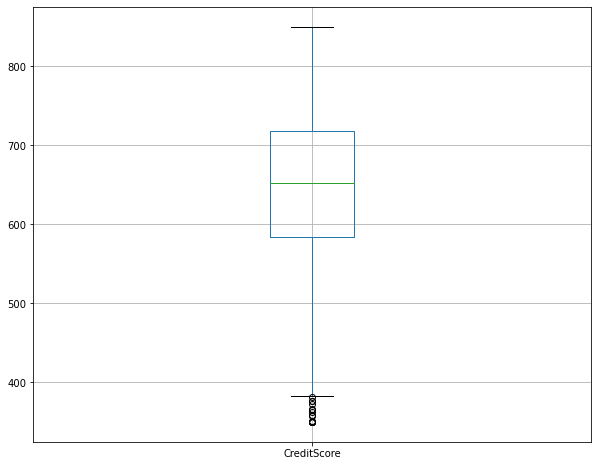

In [9]:
df.boxplot(column=['CreditScore'])

<AxesSubplot:>

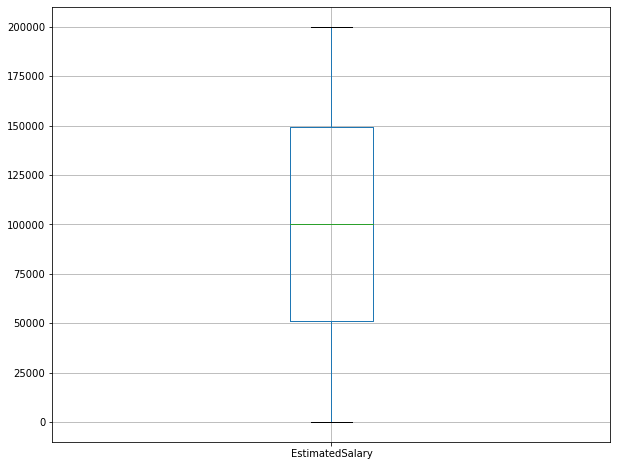

In [10]:
df.boxplot(column=['EstimatedSalary'])

<AxesSubplot:>

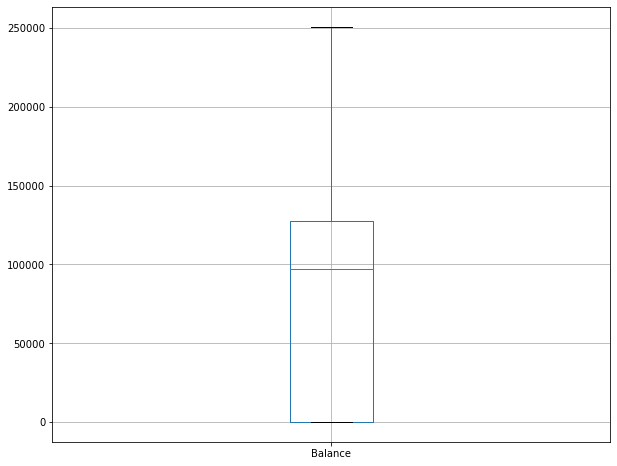

In [11]:
df.boxplot(column=['Balance'])

<AxesSubplot:>

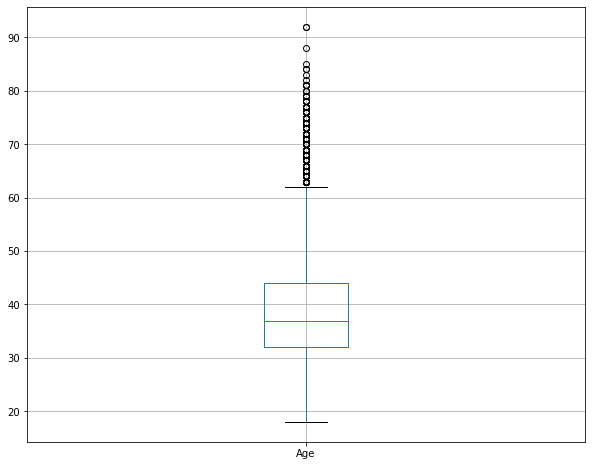

In [12]:
df.boxplot(column=['Age'])

In [13]:
df = df[df['Age'] < 60]

In [14]:
df.shape

(9474, 14)

In [15]:
df['Exited'].value_counts()

0    7584
1    1890
Name: Exited, dtype: int64

In [16]:
zero_df = df[df['Exited'] == 0]
one_df = df[df['Exited'] == 1]

In [17]:
zero_df.shape, one_df.shape

((7584, 14), (1890, 14))

In [18]:
zero_df = zero_df[:2000]

In [19]:
df = zero_df.append(one_df)

In [20]:
df.shape

(3890, 14)

In [21]:
df[['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.027317,0.013151,0.014809,0.002739,-0.025051,0.037794,-0.015462
Age,-0.027317,1.000000,-0.031160,0.036661,-0.044398,-0.020643,-0.031535,-0.000036
Tenure,0.013151,-0.031160,1.000000,-0.011261,0.022639,0.028200,-0.041978,0.026230
Balance,0.014809,0.036661,-0.011261,1.000000,-0.175712,-0.007291,-0.017390,-0.008989
NumOfProducts,0.002739,-0.044398,0.022639,-0.175712,1.000000,-0.007457,0.026148,0.012060
HasCrCard,-0.025051,-0.020643,0.028200,-0.007291,-0.007457,1.000000,-0.043674,-0.018845
IsActiveMember,0.037794,-0.031535,-0.041978,-0.017390,0.026148,-0.043674,1.000000,-0.005002
EstimatedSalary,-0.015462,-0.000036,0.026230,-0.008989,0.012060,-0.018845,-0.005002,1.000000


In [22]:
x = df[['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']].values
y = df [['Exited']].values

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [25]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2917, 8), (973, 8), (2917, 1), (973, 1))

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [27]:
lr = LogisticRegression()
svc = SVC()
rfc = RandomForestClassifier()

In [28]:
lr.fit(x_train, y_train)
svc.fit(x_train, y_train)
rfc.fit(x_train, y_train)

C:\Users\kisho\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\kisho\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-28-df9f34360f7f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


RandomForestClassifier()

In [29]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [30]:
lr.predict([[650,45,1,90000,1,1,1,20000]])

array([1], dtype=int64)

In [31]:
svc.predict([[650,45,1,90000,1,1,1,20000]])

array([1], dtype=int64)

In [32]:
rfc.predict([[650,45,1,90000,1,1,1,20000]])

array([1], dtype=int64)

In [33]:
lr.predict_proba([[650,45,1,90000,1,1,1,20000]])

array([[0.36624586, 0.63375414]])

In [35]:
rfc.predict_proba([[650,45,1,90000,1,1,1,20000]])

array([[0.27, 0.73]])

In [36]:
y_pred = lr.predict(x_test)
y_pred1 = svc.predict(x_test)
y_pred2 = rfc.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test, y_pred)

0.6680369989722508

In [39]:
accuracy_score(y_test, y_pred1)

0.5231243576567317

In [40]:
accuracy_score(y_test, y_pred2)

0.7553956834532374